In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [24]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train.shape

(60000, 784)

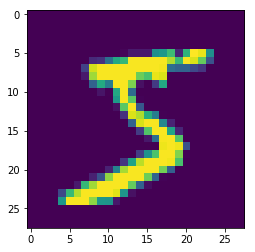

In [6]:
plt.imshow(X_train[0])

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


In [10]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 0.1876 - acc: 0.9426 - val_loss: 0.0933 - val_acc: 0.9698
Epoch 2/10
 - 26s - loss: 0.0792 - acc: 0.9751 - val_loss: 0.0947 - val_acc: 0.9710
Epoch 3/10
 - 26s - loss: 0.0536 - acc: 0.9832 - val_loss: 0.0780 - val_acc: 0.9746
Epoch 4/10
 - 27s - loss: 0.0411 - acc: 0.9875 - val_loss: 0.0791 - val_acc: 0.9773
Epoch 5/10
 - 26s - loss: 0.0310 - acc: 0.9896 - val_loss: 0.0834 - val_acc: 0.9772
Epoch 6/10
 - 26s - loss: 0.0258 - acc: 0.9912 - val_loss: 0.0736 - val_acc: 0.9813
Epoch 7/10
 - 26s - loss: 0.0236 - acc: 0.9925 - val_loss: 0.0620 - val_acc: 0.9823
Epoch 8/10
 - 26s - loss: 0.0201 - acc: 0.9935 - val_loss: 0.0747 - val_acc: 0.9813
Epoch 9/10
 - 26s - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0946 - val_acc: 0.9782
Epoch 10/10
 - 26s - loss: 0.0161 - acc: 0.9950 - val_loss: 0.0993 - val_acc: 0.9800


In [12]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.98% 
 Error: 0.020000000000000018


In [18]:
model.save('classification_model.h5')

In [20]:
from keras.models import load_model
pretrained_model = load_model('classification_model.h5')